In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings as ignore
ignore.filterwarnings('ignore')


In [5]:

data= pd.read_csv('online_retail_customer_churn.csv', encoding='latin-1')
data

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [6]:
#Checking null values 
data.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [7]:
#checking information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [8]:
#descriptive statistics
data.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,288.819436,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [9]:
# Defining a function to add Gaussian noise
def add_gaussian_noise(dataframe, std_dev=0.05):
    numeric_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns
    noise = dataframe[numeric_cols].apply(lambda x: np.random.normal(0, std_dev * x.std(), len(x)))
    noisy_df = dataframe.copy()
    noisy_df[numeric_cols] = noisy_df[numeric_cols] + noise
    return noisy_df

# Generating synthetic data
synthetic_data = add_gaussian_noise(data)

# Ensuring Customer_ID is unique and re-index
synthetic_data['Customer_ID'] = range(data['Customer_ID'].max() + 1, data['Customer_ID'].max() + len(synthetic_data) + 1)

# Combining original and synthetic data
data = pd.concat([data, synthetic_data], ignore_index=True)

# Displaying the shape of the new dataset
print(data.shape)

(2000, 15)


In [10]:
# Creating new features
data['Customer_Lifetime_Value'] = data['Total_Spend'] * data['Years_as_Customer']
data['Spend_Per_Year'] = data['Total_Spend'] / data['Years_as_Customer']
data['Purchases_Per_Year'] = data['Num_of_Purchases'] / data['Years_as_Customer']
data['Return_Rate'] = data['Num_of_Returns'] / data['Num_of_Purchases']
data['Support_Contact_Rate'] = data['Num_of_Support_Contacts'] / data['Num_of_Purchases']
income_threshold = 75000 
days_threshold = 30 
data['High_Income_Flag'] = data['Annual_Income'] > income_threshold
data['Recent_Purchase_Flag'] = data['Last_Purchase_Days_Ago'] < days_threshold
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 45, 60, 100], labels=['18-30', '31-45', '46-60', '60+'])
data['Customer_Tenure_Group'] = pd.cut(data['Years_as_Customer'], bins=[0, 5, 10, 15, 20], labels=['0-5', '6-10', '11-15', '16-20'])
data['Log_Annual_Income'] = np.log1p(data['Annual_Income'])
data['Log_Total_Spend'] = np.log1p(data['Total_Spend'])
data = pd.get_dummies(data, columns=['Gender', 'Promotion_Response'], drop_first=True)

# Print the updated DataFrame
print(data.head())


   Customer_ID   Age  Annual_Income  Total_Spend  Years_as_Customer  \
0            1  62.0          45.15      5892.58                5.0   
1            2  65.0          79.51      9025.47               13.0   
2            3  18.0          29.19       618.83               13.0   
3            4  21.0          79.63      9110.30                3.0   
4            5  21.0          77.66      5390.88               15.0   

   Num_of_Purchases  Average_Transaction_Amount  Num_of_Returns  \
0              22.0                      453.80             2.0   
1              77.0                       22.90             2.0   
2              71.0                       50.53             5.0   
3              33.0                      411.83             5.0   
4              43.0                      101.19             3.0   

   Num_of_Support_Contacts  Satisfaction_Score  ...  High_Income_Flag  \
0                      0.0                 3.0  ...             False   
1                      2

In [11]:
# Finding null values after feeature engineering
data.isnull().sum()

Customer_ID                         0
Age                                 0
Annual_Income                       0
Total_Spend                         0
Years_as_Customer                   0
Num_of_Purchases                    0
Average_Transaction_Amount          0
Num_of_Returns                      0
Num_of_Support_Contacts             0
Satisfaction_Score                  0
Last_Purchase_Days_Ago              0
Email_Opt_In                        0
Target_Churn                        0
Customer_Lifetime_Value             0
Spend_Per_Year                      0
Purchases_Per_Year                  0
Return_Rate                         0
Support_Contact_Rate                0
High_Income_Flag                    0
Recent_Purchase_Flag                0
Age_Group                          35
Customer_Tenure_Group               0
Log_Annual_Income                   0
Log_Total_Spend                     2
Gender_Male                         0
Gender_Other                        0
Promotion_Re

In [12]:
# Mode imputation for removig null values
data.fillna(data.mode().iloc[0], inplace=True)

In [13]:
# Checking of null values
data.isnull().sum()

Customer_ID                        0
Age                                0
Annual_Income                      0
Total_Spend                        0
Years_as_Customer                  0
Num_of_Purchases                   0
Average_Transaction_Amount         0
Num_of_Returns                     0
Num_of_Support_Contacts            0
Satisfaction_Score                 0
Last_Purchase_Days_Ago             0
Email_Opt_In                       0
Target_Churn                       0
Customer_Lifetime_Value            0
Spend_Per_Year                     0
Purchases_Per_Year                 0
Return_Rate                        0
Support_Contact_Rate               0
High_Income_Flag                   0
Recent_Purchase_Flag               0
Age_Group                          0
Customer_Tenure_Group              0
Log_Annual_Income                  0
Log_Total_Spend                    0
Gender_Male                        0
Gender_Other                       0
Promotion_Response_Responded       0
P

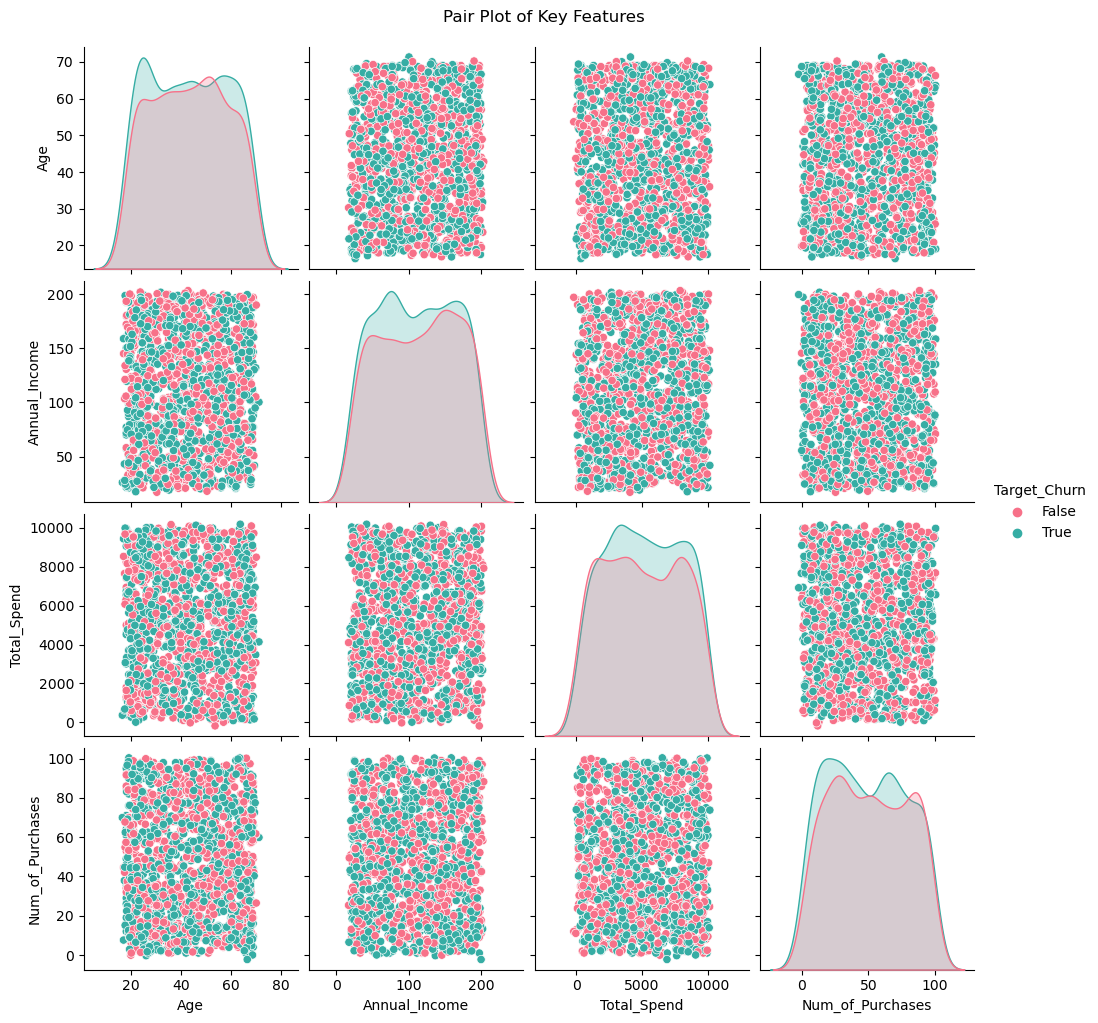

In [14]:
sns.pairplot(data[['Age', 'Annual_Income', 'Total_Spend', 'Num_of_Purchases', 'Target_Churn']],
             hue='Target_Churn', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()



In [15]:
# Creating a 'Gender' column based on one-hot encoding
data['Gender'] = data[['Gender_Male', 'Gender_Other']].idxmax(axis=1)

# Replacing 'Gender_Male' with 'Male' and 'Gender_Other' with 'Other'
data['Gender'] = data['Gender'].replace({'Gender_Male': 'Male', 'Gender_Other': 'Other'})

# Adding 'Female' if not specified in your data
data['Gender'] = data['Gender'].replace({'Gender_Male': 'Male', 'Gender_Other': 'Other'})
data.loc[~data[['Gender_Male', 'Gender_Other']].any(axis=1), 'Gender'] = 'Female'


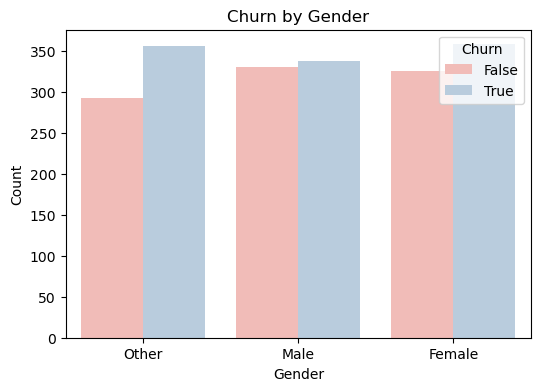

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Target_Churn', data=data, palette='Pastel1')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


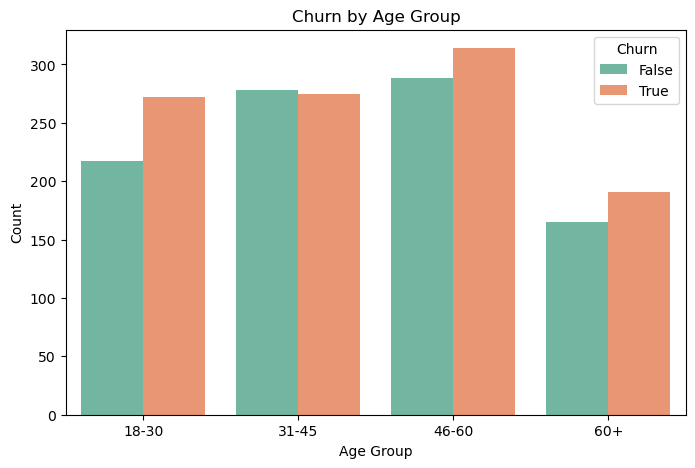

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Age_Group', hue='Target_Churn', data=data, palette='Set2')
plt.title('Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


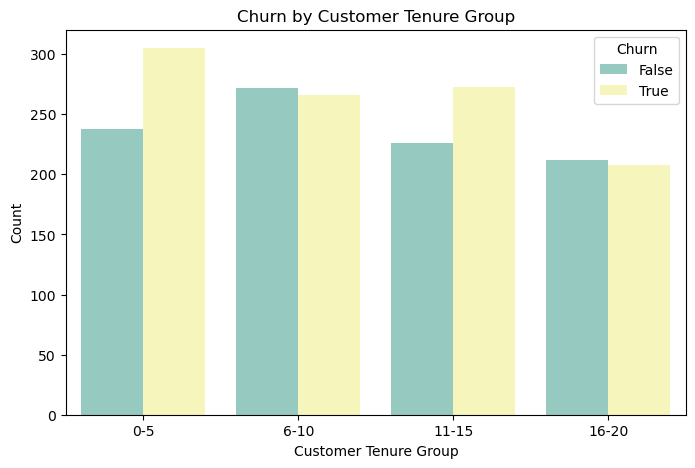

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer_Tenure_Group', hue='Target_Churn', data=data, palette='Set3')
plt.title('Churn by Customer Tenure Group')
plt.xlabel('Customer Tenure Group')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


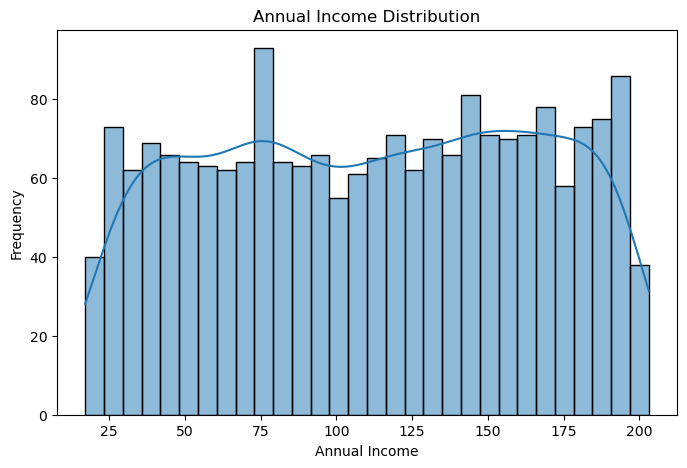

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Annual_Income'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


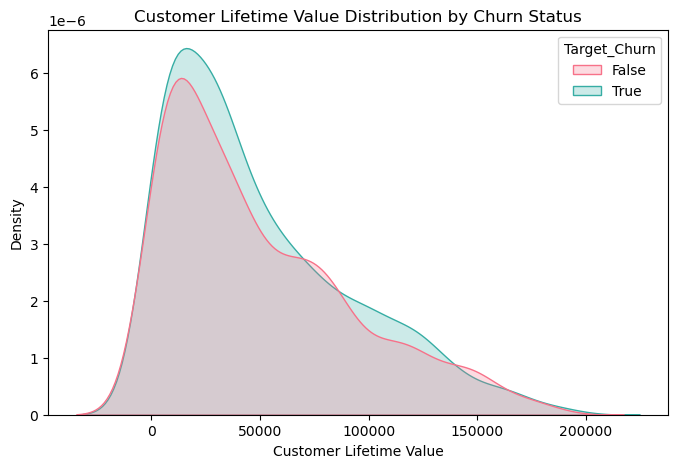

In [20]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Customer_Lifetime_Value', hue='Target_Churn', fill=True, palette='husl')
plt.title('Customer Lifetime Value Distribution by Churn Status')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Density')
plt.show()


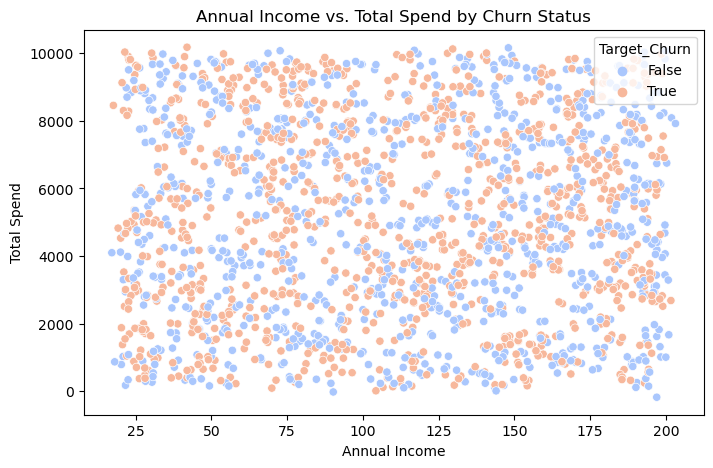

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual_Income', y='Total_Spend', hue='Target_Churn', data=data, palette='coolwarm')
plt.title('Annual Income vs. Total Spend by Churn Status')
plt.xlabel('Annual Income')
plt.ylabel('Total Spend')
plt.show()


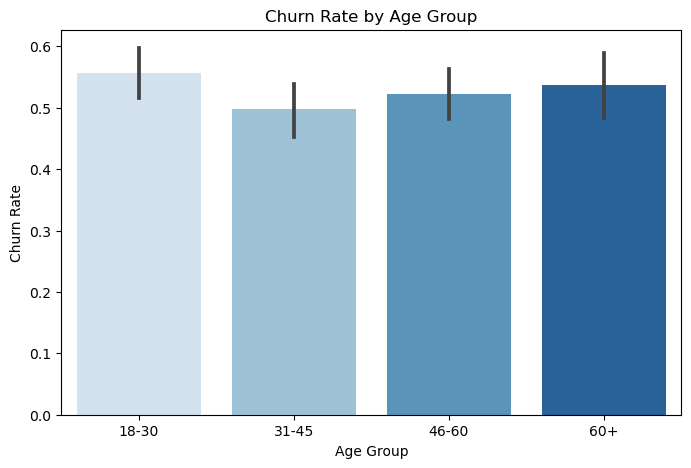

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Age_Group', y='Target_Churn', data=data, palette='Blues')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.show()


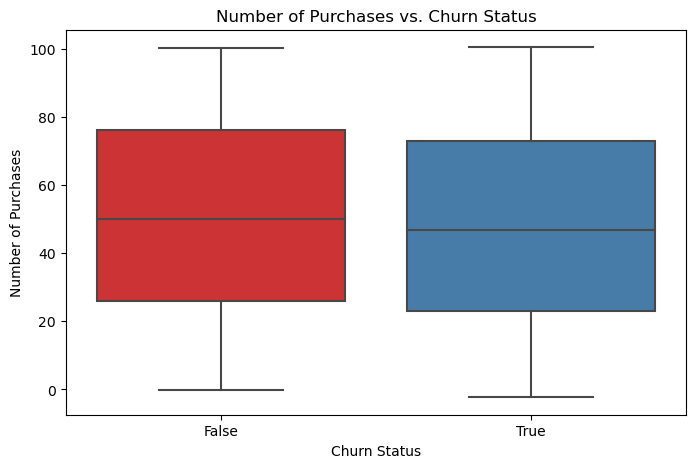

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Target_Churn', y='Num_of_Purchases', data=data, palette='Set1')
plt.title('Number of Purchases vs. Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Purchases')
plt.show()


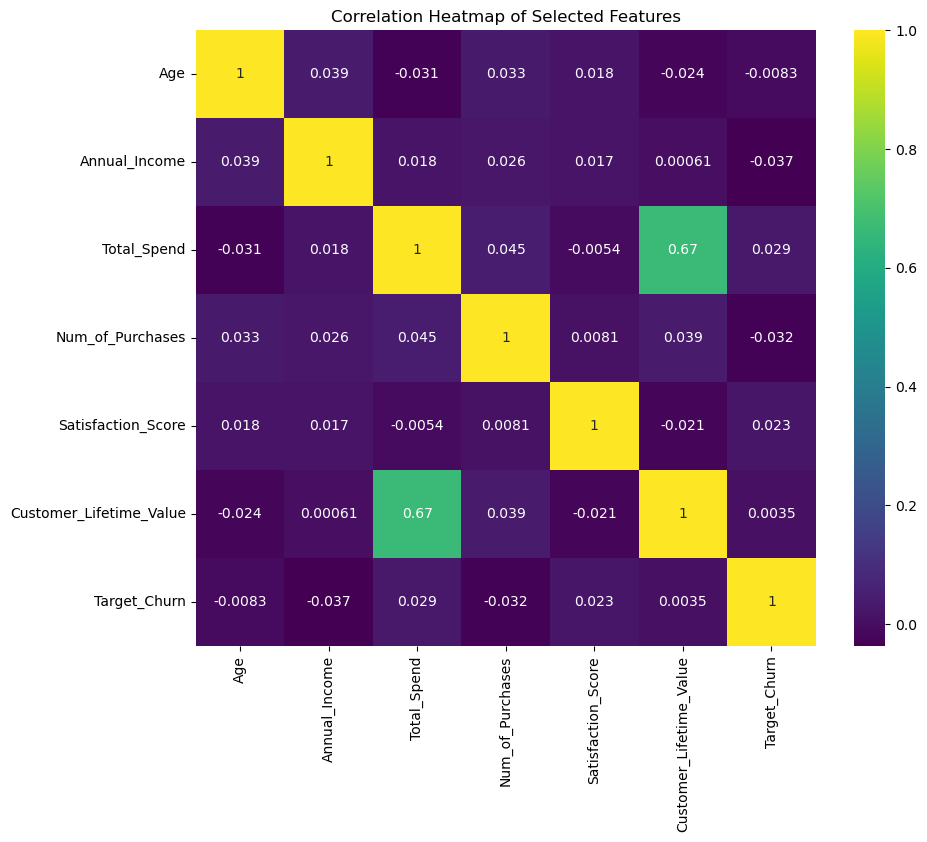

In [24]:
plt.figure(figsize=(10, 8))
selected_features = ['Age', 'Annual_Income', 'Total_Spend', 'Num_of_Purchases', 'Satisfaction_Score', 'Customer_Lifetime_Value', 'Target_Churn']
sns.heatmap(data[selected_features].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


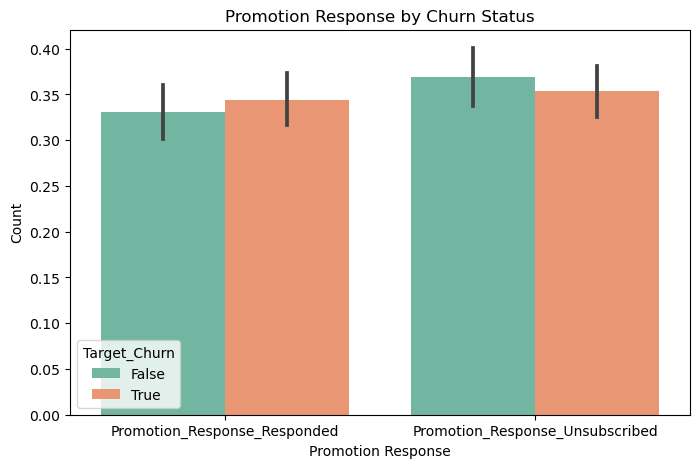

In [25]:
plt.figure(figsize=(8, 5))
promotion_data = data[['Promotion_Response_Responded', 'Promotion_Response_Unsubscribed', 'Target_Churn']]
promotion_data = promotion_data.melt(id_vars=['Target_Churn'], var_name='Promotion_Response', value_name='Count')
sns.barplot(x='Promotion_Response', y='Count', hue='Target_Churn', data=promotion_data, palette='Set2')
plt.title('Promotion Response by Churn Status')
plt.xlabel('Promotion Response')
plt.ylabel('Count')
plt.show()


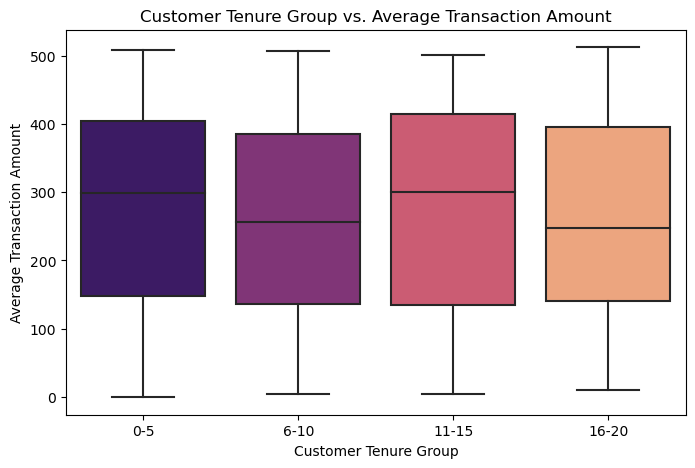

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Customer_Tenure_Group', y='Average_Transaction_Amount', data=data, palette='magma')
plt.title('Customer Tenure Group vs. Average Transaction Amount')
plt.xlabel('Customer Tenure Group')
plt.ylabel('Average Transaction Amount')
plt.show()


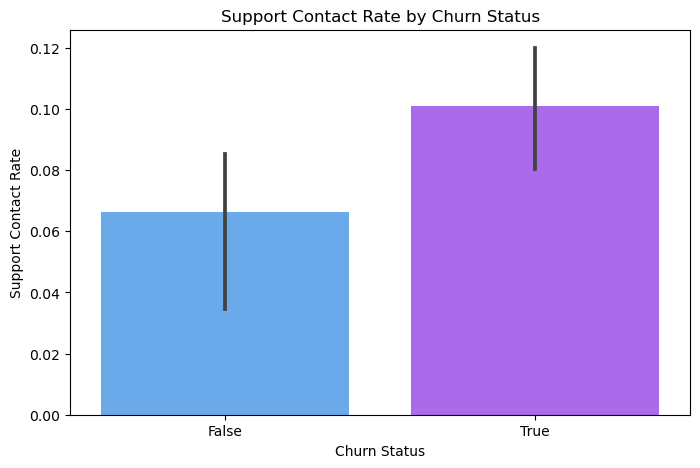

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Target_Churn', y='Support_Contact_Rate', data=data, palette='cool')
plt.title('Support Contact Rate by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Support Contact Rate')
plt.show()


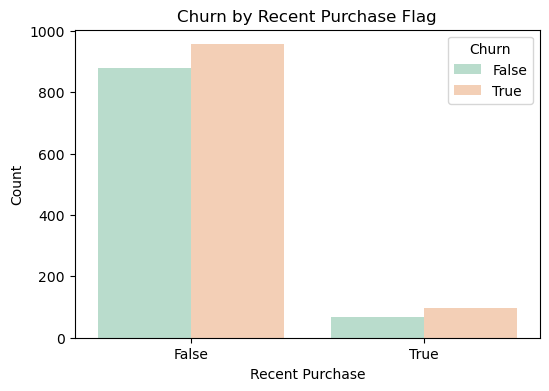

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Recent_Purchase_Flag', hue='Target_Churn', data=data, palette='Pastel2')
plt.title('Churn by Recent Purchase Flag')
plt.xlabel('Recent Purchase')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()


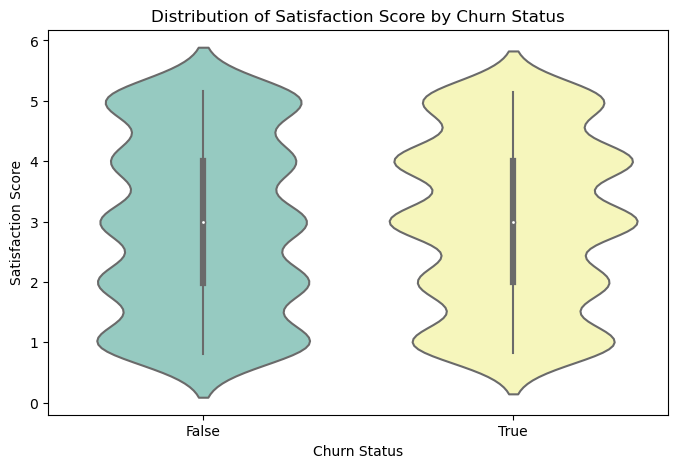

In [29]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Target_Churn', y='Satisfaction_Score', data=data, palette='Set3')
plt.title('Distribution of Satisfaction Score by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Satisfaction Score')
plt.show()


In [30]:

X = data.drop('Target_Churn', axis=1)
y = data['Target_Churn']

# Converting categorical features to numeric using one-hot encoding
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Random Forest Classifier
Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.78      0.84       200
        True       0.80      0.93      0.86       200

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



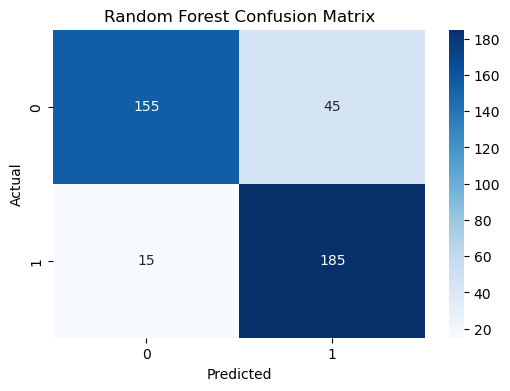

In [31]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))
rf_cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Support Vector Machine (SVM)
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       200
        True       0.50      1.00      0.67       200

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400



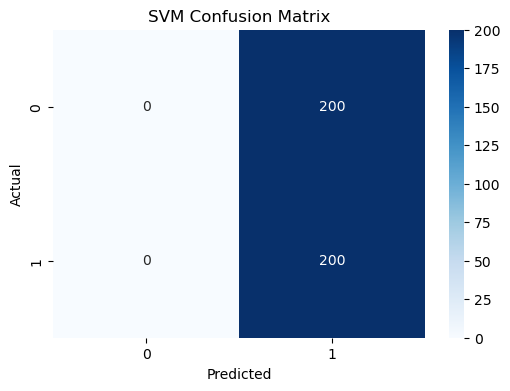

In [32]:
# 2. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))
svm_cm = confusion_matrix(y_test, svm_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting Classifier
Accuracy: 0.6075
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.46      0.54       200
        True       0.58      0.76      0.66       200

    accuracy                           0.61       400
   macro avg       0.62      0.61      0.60       400
weighted avg       0.62      0.61      0.60       400



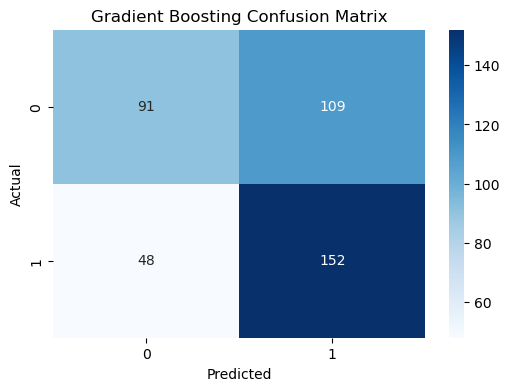

In [33]:
# 3. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report(y_test, gb_pred))
gb_cm = confusion_matrix(y_test, gb_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier
Accuracy: 0.7075
Classification Report:
               precision    recall  f1-score   support

       False       0.73      0.65      0.69       200
        True       0.69      0.77      0.72       200

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



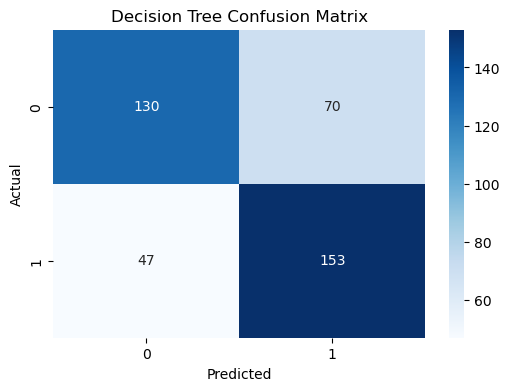

In [34]:
# 4. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))
dt_cm = confusion_matrix(y_test, dt_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()